In [1]:
from pivpy import io, pivpy, graphics
from test_graphics import *

In [2]:
import xarray as xr
from typing import List 
import numpy as np
import matplotlib.pyplot as plt

from pivpy.graphics import quiver

In [3]:
data = io.create_sample_Dataset(n_frames=2)
data

<xarray.Dataset>
Dimensions:  (x: 3, y: 5, t: 2)
Coordinates:
  * x        (x) int64 32 64 96
  * y        (y) int64 16 32 48 64 80
  * t        (t) int64 0 1
Data variables:
    u        (y, x, t) float64 1.0 1.0 6.0 6.0 11.0 ... 1.0 6.0 6.0 11.0 11.0
    v        (y, x, t) float64 -1.0 -1.0 -1.0 -1.0 -1.0 ... 1.0 1.0 1.0 1.0 1.0
    chc      (y, x, t) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
Attributes: (2)

In [4]:
data["t"].shape == ()

False

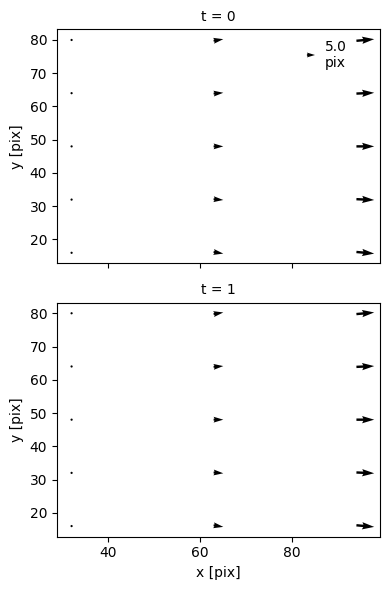

In [5]:
data.plot.quiver(x='x',y='y',u='u',v='v',row='t',scale=200)

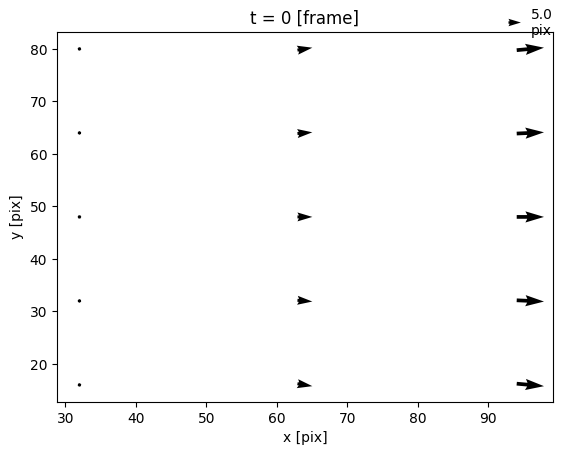

In [6]:
data.isel(t=0).plot.quiver(x='x',y='y',u='u',v='v',scale=200)

/home/user/Documents/repos/pivpy/pivpy/graphics.py:315: UserWarning: Warning: function for a single frame, using the first                frame, supply data.isel(t=N)
  warnings.warn("Warning: function for a single frame, using the first \


(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:title={'center':'t = 0 [frame]'}, xlabel='x (pix)', ylabel='y (pix)'>)

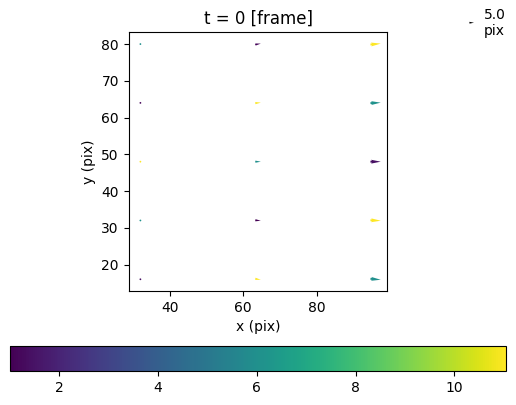

In [7]:
quiver(data,colorbar=True, colorbar_orient='horizontal')

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:title={'center':'t = 0 [frame]'}, xlabel='x (pix)', ylabel='y (pix)'>)

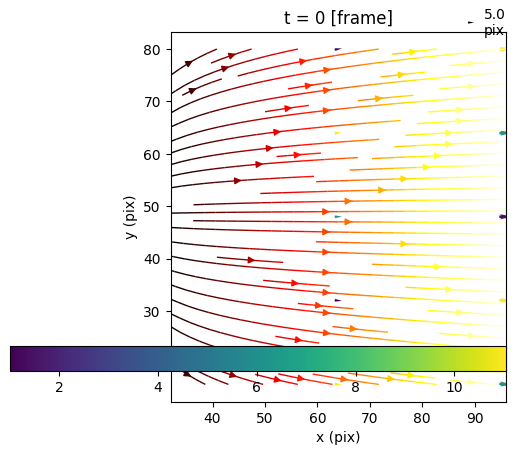

In [8]:
quiver(data,colorbar=True, colorbar_orient='horizontal', streamlines=True)

In [9]:
ds = io.load_directory(pathlib.Path('../pivpy/data/PIV_Challenge/'),ext='txt')

found 2 files


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'t = 0 [frame]'}, xlabel='x (pix)', ylabel='y (pix)'>)

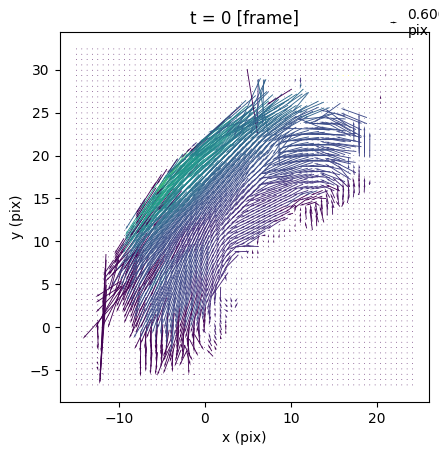

In [10]:
ds.isel(t=0).piv.quiver(arrScale=3)

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:title={'center':'t = 0 [frame]'}, xlabel='x [pix]', ylabel='y [pix]'>)

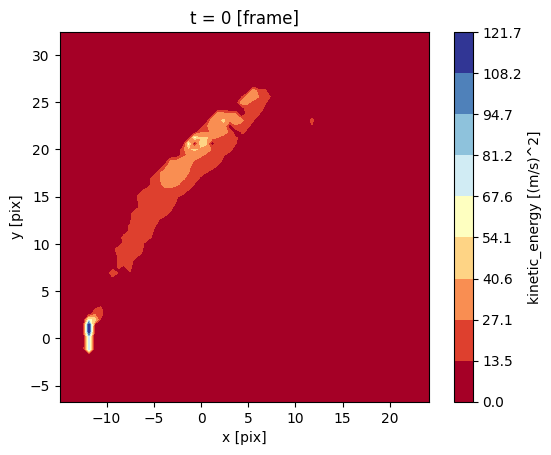

In [11]:
graphics.contour_plot(ds.isel(t=0),colorbar=True)

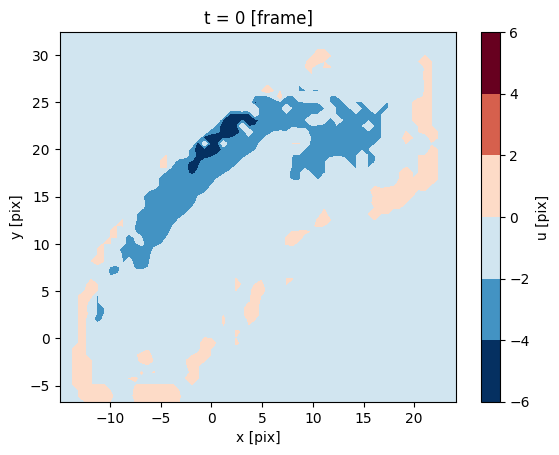

In [12]:
fig, ax = plt.subplots()
ds["u"].isel(t=0).plot.contourf(ax=ax)

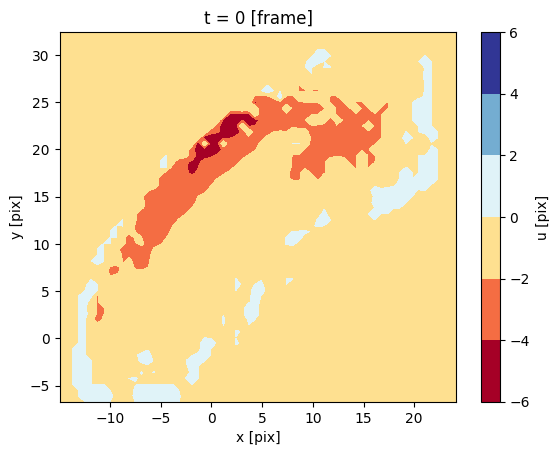

In [13]:
fig, ax = plt.subplots()
c = ds["u"].isel(t=0).plot.contourf(
    x='x',
    y='y',
    cmap=plt.get_cmap("RdYlBu"),
    ax=ax,
)

In [14]:
filename = pathlib.Path(
    pkg.resource_filename(
    "pivpy",  "data")) / "Insight" / "Run000001.T000.D000.P000.H001.L.vec"
# load data
_d = io.load_vec(filename)
_d

<xarray.Dataset>
Dimensions:  (x: 63, y: 63, t: 1)
Coordinates:
  * x        (x) float64 0.3125 0.625 0.9374 1.25 ... 18.75 19.06 19.37 19.69
  * y        (y) float64 -0.3125 -0.625 -0.9374 -1.25 ... -19.06 -19.37 -19.69
  * t        (t) int64 1
Data variables:
    u        (y, x, t) float64 0.0 0.0 0.0 0.0 0.0 ... 0.04401 0.0 0.0 0.0
    v        (y, x, t) float64 -0.0 -0.0 -0.0 -0.0 ... 0.01079 -0.0 -0.0 -0.0
    chc      (y, x, t) float64 -1.0 -1.0 -1.0 -1.0 -1.0 ... 1.0 -3.0 -3.0 -3.0
Attributes: (2)

/home/user/Documents/repos/pivpy/pivpy/graphics.py:315: UserWarning: Warning: function for a single frame, using the first                frame, supply data.isel(t=N)
  warnings.warn("Warning: function for a single frame, using the first \


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'t = 1 [frame]'}, xlabel='x (pix)', ylabel='y (pix)'>)

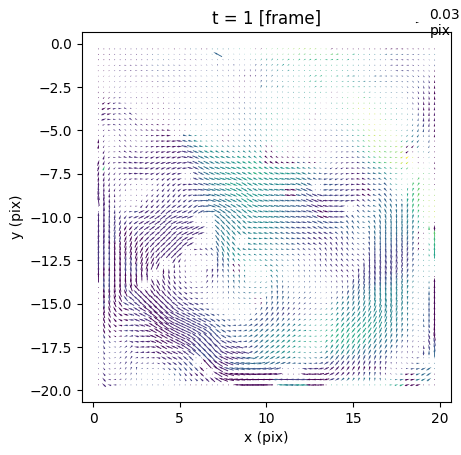

In [15]:
graphics.quiver(_d)

In [16]:
if "t" in _d.coords:
    _d = _d.isel(t=0)

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'t = 1 [frame]'}, xlabel='x (pix)', ylabel='y (pix)'>)

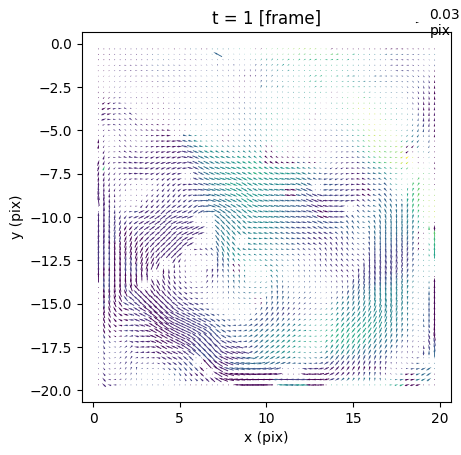

In [17]:
graphics.quiver(_d)

In [18]:
_d

<xarray.Dataset>
Dimensions:  (x: 63, y: 63)
Coordinates:
  * x        (x) float64 0.3125 0.625 0.9374 1.25 ... 18.75 19.06 19.37 19.69
  * y        (y) float64 -0.3125 -0.625 -0.9374 -1.25 ... -19.06 -19.37 -19.69
    t        int64 1
Data variables:
    u        (y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.04384 0.04401 0.0 0.0 0.0
    v        (y, x) float64 -0.0 -0.0 -0.0 -0.0 -0.0 ... 0.01079 -0.0 -0.0 -0.0
    chc      (y, x) float64 -1.0 -1.0 -1.0 -1.0 -1.0 ... 1.0 1.0 -3.0 -3.0 -3.0
    s        (y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.04526 0.04531 0.0 0.0 0.0
Attributes: (2)

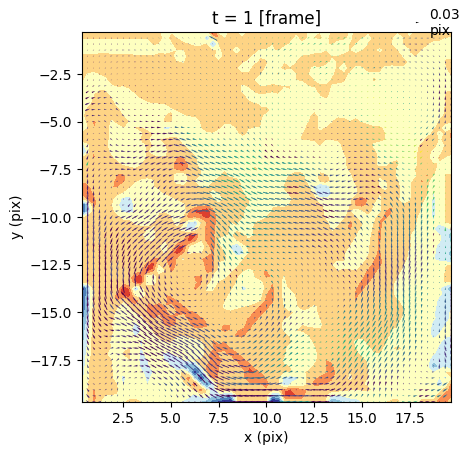

In [19]:
d = _d.piv.vec2scal(property='vort')
fig, ax = graphics.contour_plot(d)
fig, ax = graphics.quiver(d)

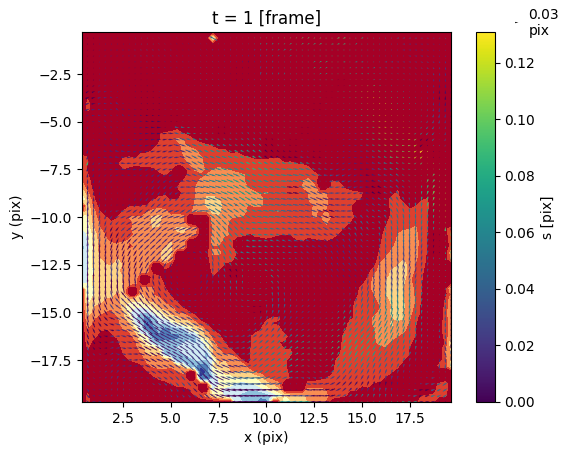

In [20]:
graphics.showf(d,colorbar=True)

In [21]:
data = io.create_sample_Dataset()
tmp = data.piv.average

In [22]:
tmp

<xarray.Dataset>
Dimensions:  (x: 3, y: 5)
Coordinates:
  * x        (x) int64 32 64 96
  * y        (y) int64 16 32 48 64 80
Data variables:
    u        (y, x) float64 1.0 6.0 11.0 1.0 6.0 11.0 ... 6.0 11.0 1.0 6.0 11.0
    v        (y, x) float64 -1.0 -1.0 -1.0 -0.5 -0.5 ... 0.5 0.5 1.0 1.0 1.0
    chc      (y, x) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0 1.0
Attributes: (2)

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='x (pix)', ylabel='y (pix)'>)

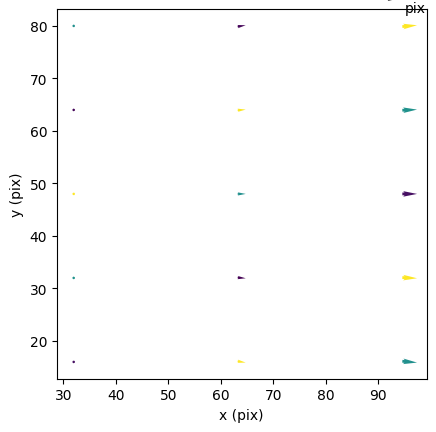

In [23]:
graphics.quiver(tmp)